<a href="https://colab.research.google.com/github/akram1903/machine-learning-projects/blob/cifar-10-basic/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(x_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)


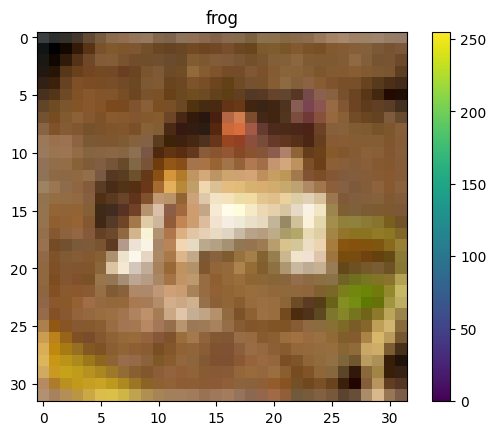

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.title(label=names[y_train[0][0]])
plt.show()
# print(names[y_train[0][0]])

In [4]:
# to make input range from 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
print(f'x shape ={x_train.shape}', f'y shape ={y_train.shape}',sep='\n')
# x_train =np.array(x_train)
# print(x_train)
# x_train = np.array([np.array([i]).flatten() for i in x_train ])
# print(x_train.shape)

x shape =(50000, 32, 32, 3)
y shape =(50000, 1)


In [6]:
# adding checkpoints to save weights:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='my_model_checkpoint.{epoch}',
    save_best_only=True,
    save_weights_only=True,  # Save only weights for efficiency
    period=20  # Save every 5 epochs
)



In [ ]:
model = Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(50,'relu',r),
        layers.Dense(30,'relu'),
        layers.Dense(30,'relu'),
        layers.Dense(30,'relu'),
        layers.Dense(10,'linear')
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
    x_train,y_train,
    epochs=10,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9656 - accuracy: 0.2678
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8489 - accuracy: 0.3214
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8179 - accuracy: 0.3380
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8029 - accuracy: 0.3446
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7910 - accuracy: 0.3495
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7785 - accuracy: 0.3540
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7695 - accuracy: 0.3585
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7638 - accuracy: 0.3594
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7582 - accuracy: 0.3634
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

In [ ]:
# adding more epochs
model.fit(
    x_train,y_train,
    epochs=50,
    callbacks=[checkpoint_callback]
)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5413 - accuracy: 0.4480
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5356 - accuracy: 0.4468
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5236 - accuracy: 0.4552
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5191 - accuracy: 0.4516
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5132 - accuracy: 0.4557
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5030 - accuracy: 0.4604
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5002 - accuracy: 0.4629
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4950 - accuracy: 0.4641
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4886 - accuracy: 0.4652
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.485

In [ ]:
# Evaluate the model on the test set
test_loss,test_acc = model.evaluate(x_test, y_test)

# Print the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", f'{test_acc*100:.2f} %')

313/313 [==============================] - 1s 2ms/step - loss: 1.5488 - accuracy: 0.4539
Test Loss: 1.5488450527191162
Test Accuracy: 45.39 %


In [ ]:
# trying to add dropout layer
modelWithDropOut = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  layers.Dense(50,'relu'),
  layers.Dense(30,'relu'),
  tf.keras.layers.Dropout(0.2),
  layers.Dense(30,'relu'),
  layers.Dense(30,'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
modelWithDropOut.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
modelWithDropOut.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6426 - accuracy: 0.4081
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6436 - accuracy: 0.4062
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6426 - accuracy: 0.4083
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6397 - accuracy: 0.4090
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6424 - accuracy: 0.4090
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6385 - accuracy: 0.4096
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6362 - accuracy: 0.4118
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6347 - accuracy: 0.4091
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6341 - accuracy: 0.4140
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6

In [ ]:
# more training
modelWithDropOut.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7512 - accuracy: 0.3663
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7453 - accuracy: 0.3672
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7388 - accuracy: 0.3694
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7341 - accuracy: 0.3704
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7323 - accuracy: 0.3715
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7239 - accuracy: 0.3815
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7194 - accuracy: 0.3790
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7195 - accuracy: 0.3795
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7151 - accuracy: 0.3793
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7

In [ ]:
# Evaluate the model on the test set
test_loss,test_acc = modelWithDropOut.evaluate(x_test, y_test)

# Print the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", f'{test_acc*100:.2f} %')

313/313 [==============================] - 1s 3ms/step - loss: 1.6669 - accuracy: 0.3945
Test Loss: 1.6669111251831055
Test Accuracy: 39.45 %


In [ ]:
probability_model = tf.keras.Sequential([modelWithDropOut,
                                         tf.keras.layers.Softmax()])


In [32]:
# reviewing samples from wrong classified photos
predictionOfDropout = probability_model.predict(x_test)
np.argmax(predictionOfDropout[0])

NameError: name 'probability_model' is not defined

In [35]:
def plot_image(i, predictions_array, true_label, img, class_names):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


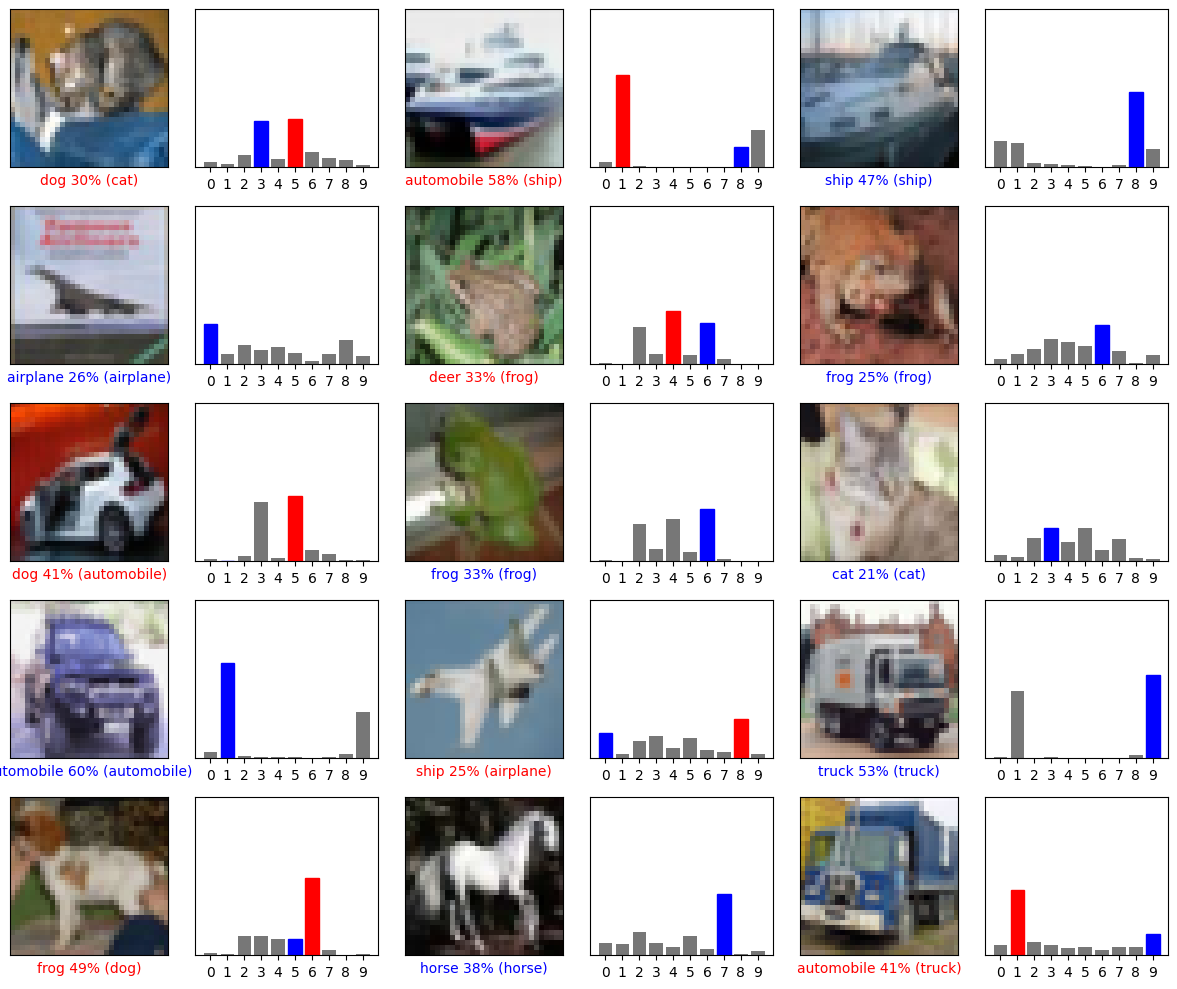

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionOfDropout[i], y_test, x_test,names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionOfDropout[i], y_test)
plt.tight_layout()
plt.show()


In [51]:
# adding regularization:

modelWithReg = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  layers.Dense(2500,'relu'),
  layers.Dense(500,'relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  layers.Dense(80,'relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  layers.Dense(30,'relu'),
  tf.keras.layers.Dropout(0.02),
  tf.keras.layers.Dense(10)
])
modelWithReg.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

In [52]:
modelWithReg.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 2.3957 - accuracy: 0.2596
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8360 - accuracy: 0.3473
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7286 - accuracy: 0.3891
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6646 - accuracy: 0.4124
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6182 - accuracy: 0.4298
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5839 - accuracy: 0.4448
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5574 - accuracy: 0.4527
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5315 - accuracy: 0.4604
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5120 - accuracy: 0.4724
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

In [62]:
finalmodel = tf.keras.Sequential([modelWithReg,
                                         tf.keras.layers.Softmax()])
finalmodel.compile(metrics=['accuracy'])

In [59]:
# reviewing samples from wrong classified photos
predictionOfFinal = finalmodel.predict(x_test)
np.argmax(predictionOfFinal[0])

313/313 [==============================] - 1s 2ms/step


3

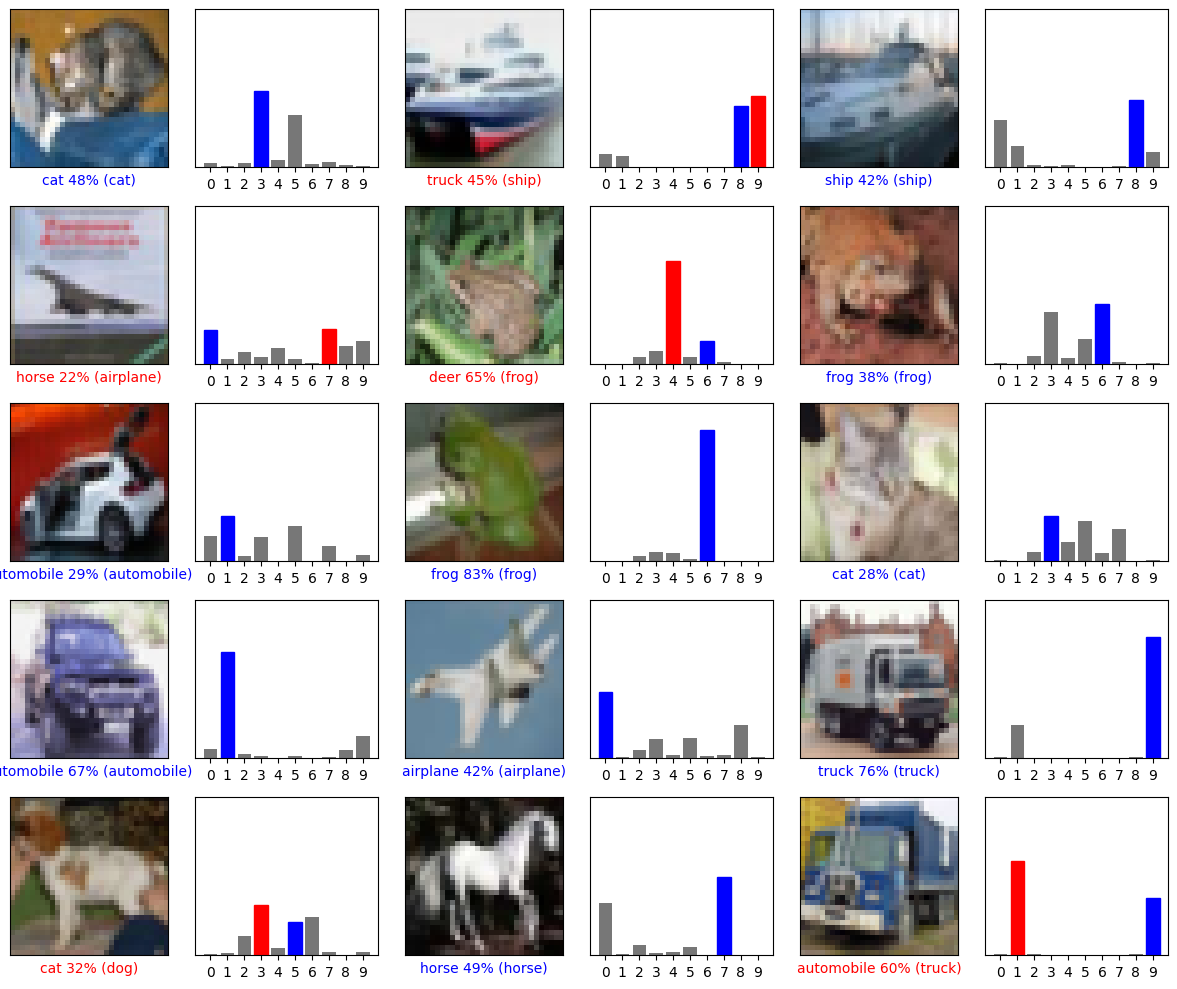

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionOfFinal[i], y_test, x_test,names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionOfFinal[i], y_test)
plt.tight_layout()
plt.show()

In [66]:

loss,accuracy = finalmodel.evaluate(x=x_test,y=y_test)
print(f'accuracy = {accuracy*100:.2f} %')

313/313 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.5123
accuracy = 51.23 %
